## Laplace Equation in the unit square

We're going to solve the Laplace Equation in the unit square:

\begin{equation*}
    \frac{\partial ^ 2 u (x, y)}{\partial x ^ 2} + \frac{\partial ^ 2 u (x, y)}{\partial y ^ 2} = 0
\end{equation*}

\begin{equation*}
    \begin{cases}
        u (x, - \frac{1}{2}) = f _ 1 (x) \quad \text{for} \quad x \in [- \frac{1}{2}, \frac{1}{2}] \\
        u (x, \frac{1}{2}) = f _ 2 (x) \quad \text{for} \quad x \in [- \frac{1}{2}, \frac{1}{2}] \\
        u (- \frac{1}{2}, y) = f _ 3 (y) \quad \text{for} \quad y \in [- \frac{1}{2}, \frac{1}{2}] \\
        u (\frac{1}{2}, y) = f _ 4 (y) \quad \text{for} \quad y \in [- \frac{1}{2}, \frac{1}{2}]
    \end{cases}
\end{equation*}

Let's rewrite this equation using the central difference approximation of the second derivative:

\begin{equation*}
    \frac{d ^ 2 g(t)}{dt ^ 2} = \frac{g(t + h) - 2 g(t) + g(t - h)}{h ^ 2}
\end{equation*}

Applying this we get:

\begin{equation*}
    \frac{u(x_{i + 1} , y_j) - 2 u(x_i, y_j) + u(x_{i - 1}, y_j)}{\Delta x ^ 2} + \frac{u(x_i, y_{i + j}) - 2 u (x_i, y_j) + u (x_i, y_{j - 1})}{\Delta y ^ 2} = 0
\end{equation*}

Where $x_i = x_0 + i \Delta x$ and $y_j = y_0 + j \Delta y$. Assuming $\Delta x = \Delta y$ we get:

\begin{equation*}
    u(x_i, y_j) = \frac{1}{4} \left[ u(x_{i + 1}, y_j) + u(x_{i - 1, y_j}) + u(x_i, y_{j + 1}) + u(x_i, y_{j - 1}) \right] 
\end{equation*}








We'll use NumPy with Numba for higher computational speed

In [1]:
# Importing libraries
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

plt.style.use("bmh")

In [2]:
# Creating the mesh
t = np.linspace(- 1 / 2, 1 / 2, 300)
x, y = np.meshgrid(t, t) # Global

In [3]:
x

array([[-0.5       , -0.49665552, -0.49331104, ...,  0.49331104,
         0.49665552,  0.5       ],
       [-0.5       , -0.49665552, -0.49331104, ...,  0.49331104,
         0.49665552,  0.5       ],
       [-0.5       , -0.49665552, -0.49331104, ...,  0.49331104,
         0.49665552,  0.5       ],
       ...,
       [-0.5       , -0.49665552, -0.49331104, ...,  0.49331104,
         0.49665552,  0.5       ],
       [-0.5       , -0.49665552, -0.49331104, ...,  0.49331104,
         0.49665552,  0.5       ],
       [-0.5       , -0.49665552, -0.49331104, ...,  0.49331104,
         0.49665552,  0.5       ]])

In [4]:
y

array([[-0.5       , -0.5       , -0.5       , ..., -0.5       ,
        -0.5       , -0.5       ],
       [-0.49665552, -0.49665552, -0.49665552, ..., -0.49665552,
        -0.49665552, -0.49665552],
       [-0.49331104, -0.49331104, -0.49331104, ..., -0.49331104,
        -0.49331104, -0.49331104],
       ...,
       [ 0.49331104,  0.49331104,  0.49331104, ...,  0.49331104,
         0.49331104,  0.49331104],
       [ 0.49665552,  0.49665552,  0.49665552, ...,  0.49665552,
         0.49665552,  0.49665552],
       [ 0.5       ,  0.5       ,  0.5       , ...,  0.5       ,
         0.5       ,  0.5       ]])

In [5]:
# Arbitrary boundary conditions, global
edge_below = np.sqrt(np.abs(t))
edge_above = np.exp(- t / 3)
edge_left = t ** 2
edge_right = 1 / (t ** 2 + 1)

In [6]:
# Defining the high-speed solver with tolerance
@jit(nopython = True, fastmath = True, nogil = True)
def solver_square(tolerance = 1e-7):
    
    global edge_below, edge_above, edge_left, edge_right

    # Initializing solution grid
    u = np.zeros((len(edge_below), len(edge_left)))
    
    # Applying boundary conditions
    u[0, :] = edge_below
    u[-1, :] = edge_above
    u[:, 0] = edge_left
    u[:, -1] = edge_right

    length = len(u[0])

    iter = 0

    # Iterating up to N times or until convergence
    while(True):
        iter += 1
    
        u_old = u.copy()
        
        for j in range(1, length - 1):
            for i in range(1, length - 1):
                u[i][j] = 1 / 4 * (u[i + 1][j] + u[i - 1][j] + u[i][j + 1] + u[i][j - 1])
        
        # Calculating the maximum difference between the old and new solution
        max_diff = np.max(np.abs(u - u_old))
        
        # If the maximum difference is below the tolerance, halt the iteration
        if max_diff < tolerance:
            break

    return (u, iter)

In [7]:
def plotter(s, u):
    
    global x, y
    
    fig = plt.figure(figsize = (12, 6))
    
    # Creating a 2D subplot
    ax1 = fig.add_subplot(121)
    c = ax1.contourf(x, y, u, 200, cmap = "seismic")
    fig.colorbar(c, ax = ax1)
    ax1.set_title(s, fontweight = "bold", fontsize = 14)
    ax1.set_xlabel("X", fontweight = "bold", fontsize = 10)
    ax1.set_ylabel("Y", fontweight = "bold", fontsize = 10)
    ax1.grid(False)

    # Creating a 3D subplot
    ax2 = fig.add_subplot(122, projection = "3d")
    surf = ax2.plot_surface(x, y, u, cmap = "seismic", edgecolor = "none", antialiased = True, shade = True)
    ax2.set_title(s, fontweight = "bold", fontsize = 14)
    ax2.set_xlabel("X", fontweight = "bold", fontsize = 10)
    ax2.set_ylabel("Y", fontweight = "bold", fontsize = 10)
    ax2.set_zlabel("U", fontweight = "bold", fontsize = 10)

    fig.colorbar(surf, ax = ax2)

    plt.show()

In [8]:
# Solving the problem
u, iter = solver_square()

In [9]:
print("Number of iterations: ", iter)
u

Number of iterations:  63279


array([[0.25      , 0.70473791, 0.70236104, ..., 0.70236104, 0.70473791,
        0.8       ],
       [0.2466667 , 0.47293343, 0.56097994, ..., 0.73250604, 0.75328075,
        0.80213901],
       [0.24335578, 0.37934916, 0.46746787, ..., 0.7529303 , 0.77374005,
        0.80427502],
       ...,
       [0.24335578, 0.52380097, 0.70672264, ..., 0.82923257, 0.81918569,
        0.80427502],
       [0.2466667 , 0.71112019, 0.89396893, ..., 0.83636956, 0.82628005,
        0.80213901],
       [0.25      , 1.18004413, 1.17872932, ..., 0.84837119, 0.84742593,
        0.8       ]])

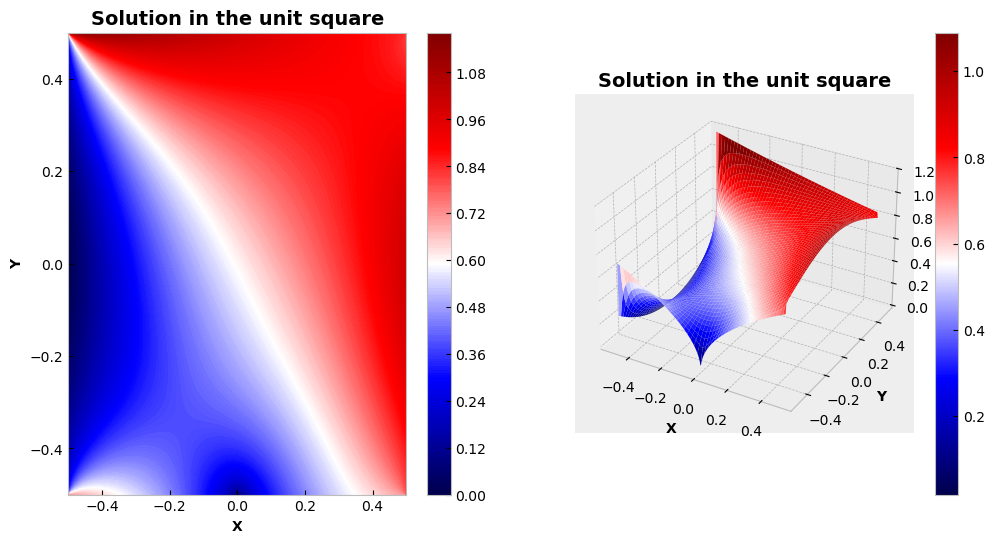

In [10]:
# Plotting the solution
plotter("Solution in the unit square", u)

## Laplace Equation in the unit square with a fixed value

Let's now add in the unit square another smaller square where the potential in constant:

\begin{equation*}
    \frac{\partial ^ 2 u (x, y)}{\partial x ^ 2} + \frac{\partial ^ 2 u (x, y)}{\partial y ^ 2} = 0
\end{equation*}

\begin{equation*}
    \begin{cases}
        u (x, - \frac{1}{2}) = f _ 1 (x) \quad \text{for} \quad x \in [- \frac{1}{2}, \frac{1}{2}] \\
        u (x, \frac{1}{2}) = f _ 2 (x) \quad \text{for} \quad x \in [- \frac{1}{2}, \frac{1}{2}] \\
        u (- \frac{1}{2}, y) = f _ 3 (y) \quad \text{for} \quad y \in [- \frac{1}{2}, \frac{1}{2}] \\
        u (\frac{1}{2}, y) = f _ 4 (y) \quad \text{for} \quad y \in [- \frac{1}{2}, \frac{1}{2}] \\
        u (x, y) = \frac{1}{2} \quad \text{if} \quad (x, y) \in [- \frac{1}{4}, \frac{1}{4}] \times [- \frac{1}{4}, \frac{1}{4}] 
    \end{cases}
\end{equation*}


In [11]:
# Defining the fixed square
def selector(C, x_min, x_max, y_min, y_max):

    global x, y

    # Using NumPy select()
    fixed_values = np.select([(x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max)], 
                             [C], 
                             default = 0)
    
    # Yielding the fixed values and a boolean mask where the values are non-zero
    return (fixed_values, fixed_values != 0)

In [12]:
fixed_values, bool_values = selector(C = 1 / 2, x_min = - 1 / 4, x_max = 1 / 4, y_min = - 1 / 4, y_max = 1 / 4)

In [13]:
# 1 / 2 in the middle
fixed_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
# True in the middle
bool_values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
# Defining the high-speed solver for the presence of the fixed square with tolerance
@jit(nopython = True, fastmath = True, nogil = True)
def solver_fixed_square(tolerance = 1e-7):
    
    global x, y, edge_below, edge_above, edge_left, edge_right, fixed_values, bool_values
    
    # Initializing solution grid
    u = np.zeros((len(edge_below), len(edge_left)))  

    # Applying boundary conditions
    u[0, :] = edge_below
    u[-1, :] = edge_above
    u[:, 0] = edge_left
    u[:, -1] = edge_right

    length = len(u[0])

    iter = 0
    
    # Manually applying the mask for fixed values
    for i in range(len(u)):
        for j in range(length):
            if bool_values[i, j]:
                u[i, j] = fixed_values[i, j]

    # Iterative solving with tolerance
    while(True):
        iter += 1

        u_old = u.copy()

        for j in range(1, length - 1):
            for i in range(1, length - 1):
                if not bool_values[i, j]:
                    u[i][j] = 1 / 4 * (u[i + 1][j] + u[i - 1][j] + u[i][j + 1] + u[i][j - 1])

        # Calculating the maximum difference between the new and old solution
        max_diff = np.max(np.abs(u - u_old))

        # If the maximum difference is below the tolerance, halt the iteration
        if max_diff < tolerance:
            break

    return (u, iter)

In [16]:
u, iter = solver_fixed_square()

In [17]:
print("Number of iterations: ", iter)
u

Number of iterations:  11513


array([[0.25      , 0.70473791, 0.70236104, ..., 0.70236104, 0.70473791,
        0.8       ],
       [0.2466667 , 0.47295251, 0.56101811, ..., 0.73246306, 0.75325926,
        0.80213901],
       [0.24335578, 0.37938733, 0.4675442 , ..., 0.75284433, 0.77369706,
        0.80427502],
       ...,
       [0.24335578, 0.5237815 , 0.70668368, ..., 0.8290482 , 0.81909351,
        0.80427502],
       [0.2466667 , 0.71111045, 0.89394944, ..., 0.83627738, 0.82623396,
        0.80213901],
       [0.25      , 1.18004413, 1.17872932, ..., 0.84837119, 0.84742593,
        0.8       ]])

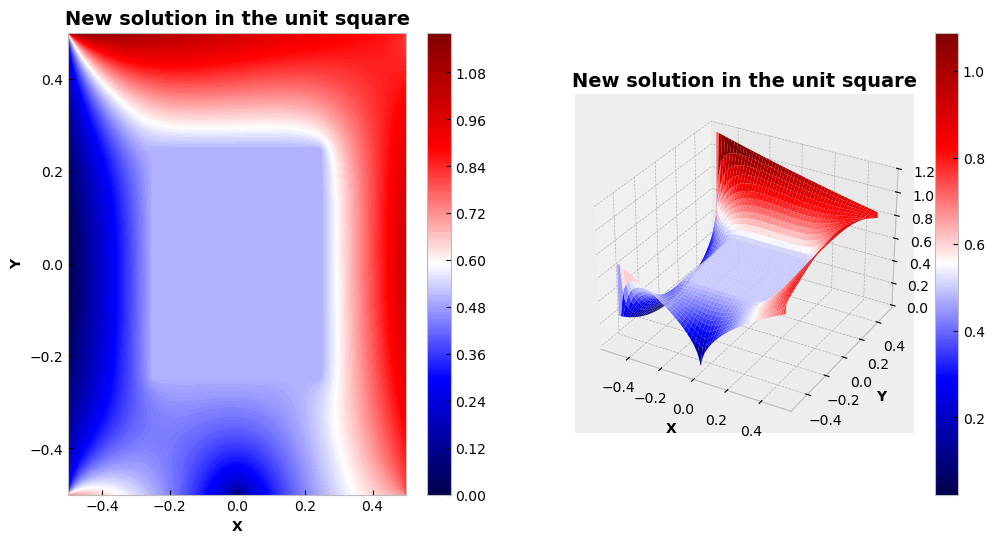

In [18]:
# Plotting the solution
plotter("New solution in the unit square", u)